In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize( (0.5, 0.5, 0.5), (0.5, 0.5, 0.5) )])

In [3]:
download_path = "../prototype/pytorch_prototype/data"

trainset = torchvision.datasets.CIFAR10(
    root=download_path,
    train=True,
    download=True,
    transform=transform)

testset = torchvision.datasets.CIFAR10(
    root=download_path,
    train=False,
    download=True,
    transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
import random

# 複数クラスラベルのデータセットから指定クラスラベルの1データセットを取得
def get_one_label_data(class_label, dataset):
    new_data = []
    for data in dataset:
        label = data[1]
        if label == class_label:
            new_data.append(data)
    return new_data

# 複数クラスラベルのデータセットから指定クラスラベルのtrain, testデータセットを取得
def get_one_label_dataset(class_label, train, test):
    train = get_one_label_data(class_label, train)
    test = get_one_label_data(class_label, test)
    return train, test

# 1データセットのラベルを指定のラベルに変更
def change_label_data(new_label, dataset):
    new_data = []
    for data in dataset:
        new_data.append((data[0], new_label))
    return new_data

# train, testデータセットのラベルを指定のラベルに変更
def change_label_dataset(new_label, train, test):
    train = change_label_data(new_label, train)
    test = change_label_data(new_label, test)
    return train, test

# 指定データ数分のtrainデータをランダムに取得
# data_n: 1クラスのデータ数
def choice_train_at_random(data_n, train):
    train = random.sample(train, data_n)
    return train

# 指定クラスラベルリストのtrain, testデータセットを取得
def get_specific_label_dataset(class_label_list, train, test, data_n=None):
    new_train = []
    new_test = []
    for i, label in enumerate(class_label_list):
        got_train, got_test = get_one_label_dataset(label, train, test)
        got_train, got_test = change_label_dataset(i, got_train, got_test)
        if data_n != None:
            got_train = choice_train_at_random(data_n, got_train)
        new_train += got_train
        new_test += got_test
    return new_train, new_test

In [5]:
class_label_list = [3,4,6]
new_train, new_test = get_specific_label_dataset(class_label_list, trainset, testset, 50)

In [12]:
new_train[102]

(tensor([[[-0.2863, -0.2314, -0.2863,  ..., -0.3882, -0.4118, -0.3961],
          [-0.3961, -0.3961, -0.3098,  ..., -0.5451, -0.5686, -0.5529],
          [-0.3725, -0.3804, -0.2863,  ..., -0.5451, -0.5686, -0.5529],
          ...,
          [ 0.2000,  0.2784,  0.3804,  ...,  0.2549,  0.3020,  0.2863],
          [-0.0431,  0.1294,  0.3412,  ...,  0.3647,  0.3412,  0.3255],
          [ 0.0667,  0.1294,  0.1294,  ...,  0.4353,  0.4902,  0.3882]],
 
         [[-0.2157, -0.1608, -0.2314,  ..., -0.3098, -0.3333, -0.3255],
          [-0.3255, -0.3333, -0.2392,  ..., -0.4902, -0.5137, -0.4902],
          [-0.3255, -0.3333, -0.2314,  ..., -0.4745, -0.4902, -0.4745],
          ...,
          [ 0.3020,  0.4039,  0.4745,  ...,  0.3176,  0.3804,  0.3804],
          [ 0.0431,  0.2392,  0.4431,  ...,  0.4431,  0.4353,  0.4039],
          [ 0.1216,  0.1843,  0.2000,  ...,  0.4588,  0.5216,  0.4275]],
 
         [[-0.7333, -0.7490, -0.8353,  ..., -0.8275, -0.8510, -0.7804],
          [-0.8667, -0.8275,

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

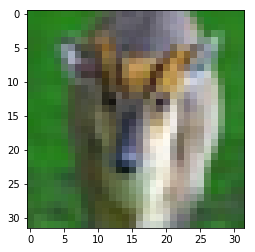

In [25]:
images = new_train[52][0]
imshow(torchvision.utils.make_grid(images))